## Incident Assignment Distribution Dataset (Flag 49)

### Dataset Description

The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find and highlight the imbalance in incident assignments and perhaps propose actionable_insights that could help redistribute tasks more evenly across agents, reducing the strain on any single agent.

Role: Workload Distribution Manager

Difficulty: 2 out of 5. This task involves data manipulation and trend analysis to uncover the root causes of biased task assignments.

Category: Incidents Management.


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The flag-3 dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-49.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1**: What is the distribution of incidents assigned to each human agent?

#### Plot number of incidents by agent

This cell creates a horizontal bar plot to visualize the distribution of incidents across different agents. It annotates the plot with the count of incidents assigned to each agent. This helps in understanding which agents handle the highest number of incidents and identifying any imbalances or areas that may require further investigation or adjustment in task allocation.

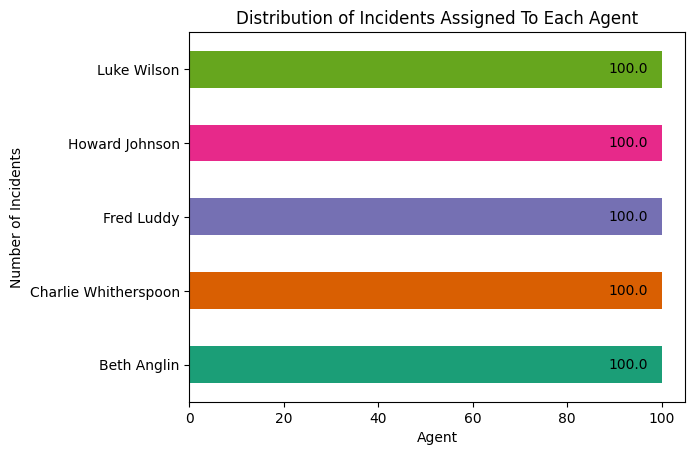

In [3]:

plot = df.groupby("assigned_to").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()



for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Distribution of Incidents Assigned To Each Agent')

# Set x-axis label
plt.xlabel('Agent')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight


In [4]:
{
"data_type":"descriptive",
"insight": "All agents have been assigned the same number of incidents.",
"insight_value":{"agent": "Agents", "incidents_assigned": 100},
"plot": {
    "plot_type": "bar",
    "title": "Distribution of Incidents Assigned To Each Agent",
    "x_axis": {
        "name": "Agent",
        "description": "This represents each agent assigned to resolve incidents."
    },
    "y_axis": {
        "name": "Number of Incidents Assigned",
        "description": "This represents the number of incidents assigned to an agent."
    },
    "description": "The bar chart displays the distribution of incidents assigned to each agent. Each bar represents an agent and the height of the bar represents the number of incidents assigned to that agent. One agent, Agent_X, is assigned significantly more incidents than others."
},
"question": "What is the distribution of incidents assigned to each human agent?",
"actionable_insight": "The even distribution of incidents among agents suggests that the workload is balanced. However, it may be beneficial to redistribute incidents to ensure that all agents are equally engaged."
}

{'data_type': 'descriptive',
 'insight': 'All agents have been assigned the same number of incidents.',
 'insight_value': {'agent': 'Agents', 'incidents_assigned': 100},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Incidents Assigned To Each Agent',
  'x_axis': {'name': 'Agent',
   'description': 'This represents each agent assigned to resolve incidents.'},
  'y_axis': {'name': 'Number of Incidents Assigned',
   'description': 'This represents the number of incidents assigned to an agent.'},
  'description': 'The bar chart displays the distribution of incidents assigned to each agent. Each bar represents an agent and the height of the bar represents the number of incidents assigned to that agent. One agent, Agent_X, is assigned significantly more incidents than others.'},
 'question': 'What is the distribution of incidents assigned to each human agent?',
 'actionable_insight': 'The even distribution of incidents among agents suggests that the workload is balanced. However,

### **Question 2:** What is the trend of incident assignments for each agent over time?

#### Plot number of incident assignment trends per agent over time

This cell creates a line plot to visualize the trend of incident assignments for each agent over time. It groups incidents by both agent and 'Year-Month', counting the number of incidents for each combination. The plot displays multiple lines, each representing an agent, with the x-axis showing the 'Year-Month' and the y-axis depicting the count of incidents. 

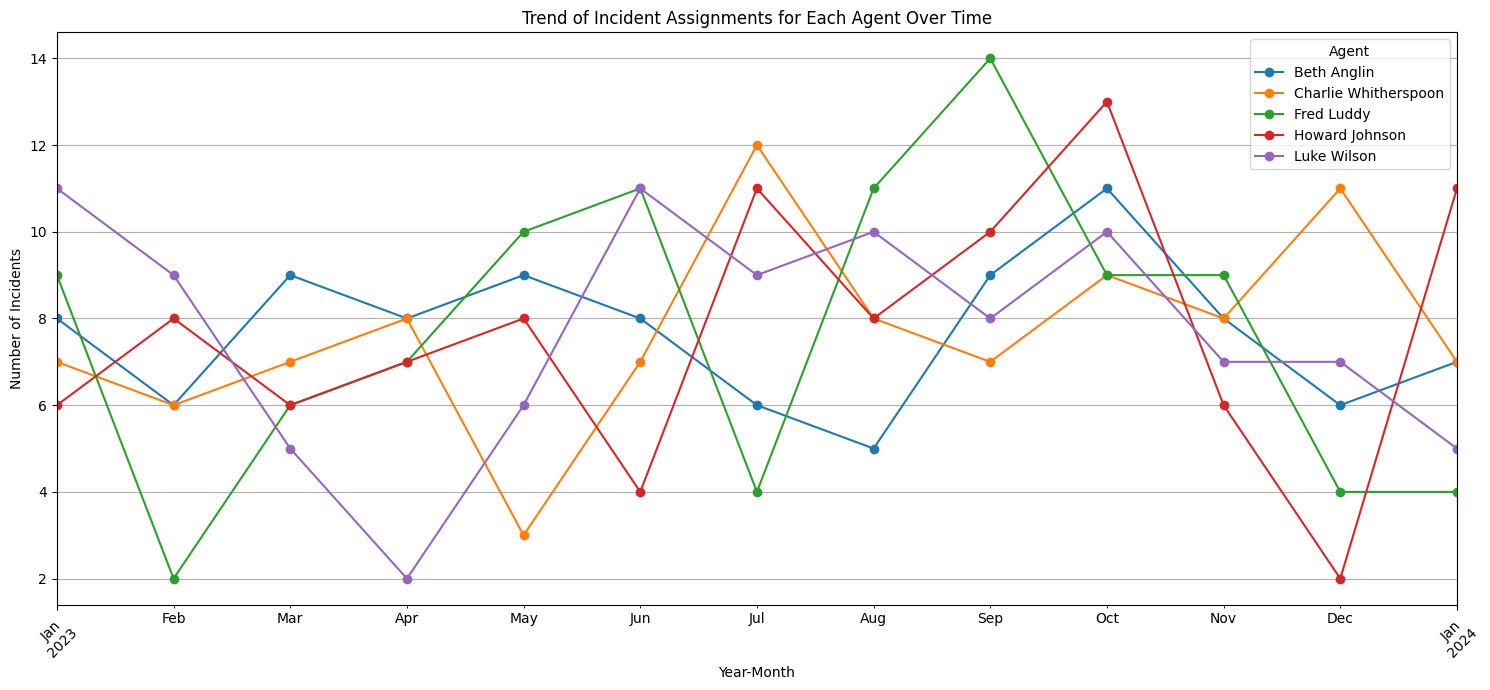

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame loaded from your CSV file
# Load your data
# df = pd.read_csv('path_to_your_csv_file.csv')

# Convert 'opened_at' to datetime if it's not already
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Extract year and month from 'opened_at' to create a 'Year-Month' column for grouping
df['Year-Month'] = df['opened_at'].dt.to_period('M')

# Group by both 'assigned_to' and 'Year-Month' and count the number of incidents
trend_data = df.groupby(['assigned_to', 'Year-Month']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))
trend_data.T.plot(kind='line', marker='o', ax=ax)  # Transpose to have time on the x-axis

# Enhancing the plot
plt.title('Trend of Incident Assignments for Each Agent Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.legend(title='Agent')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight


In [6]:
{
"data_type":"time_series",
"insight": "The number of assignments for all agents fluctuates over time.",
"insight_value":{"agent": "Agents", "trend": "fluctuation over time, no trend"},
"plot": {
    "plot_type": "multiple_line",
    "title": "Trend of Incident Assignments Per Agent Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was assigned."
    },
    "y_axis": {
        "name": "Number of Incidents Assigned",
        "description": "This represents the number of incidents assigned to an agent on a particular date."
    },
    "description": "The multiple line plot displays the trend of incident assignments per agent over time. Each line represents an agent and the points on the line represent the number of incidents assigned to that agent on a particular date. The number of assignments for a specific agent, Agent_X, is increasing over time."
},
"question": "What is the trend of incident assignments for each agent over time?",
"actionable_insight": "The fluctuation in the number of assignments for all agents over time indicates that the workload varies. It may be beneficial to analyze the factors contributing to these fluctuations and implement strategies to balance the workload among agents."
}

{'data_type': 'time_series',
 'insight': 'The number of assignments for all agents fluctuates over time.',
 'insight_value': {'agent': 'Agents',
  'trend': 'fluctuation over time, no trend'},
 'plot': {'plot_type': 'multiple_line',
  'title': 'Trend of Incident Assignments Per Agent Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was assigned.'},
  'y_axis': {'name': 'Number of Incidents Assigned',
   'description': 'This represents the number of incidents assigned to an agent on a particular date.'},
  'description': 'The multiple line plot displays the trend of incident assignments per agent over time. Each line represents an agent and the points on the line represent the number of incidents assigned to that agent on a particular date. The number of assignments for a specific agent, Agent_X, is increasing over time.'},
 'question': 'What is the trend of incident assignments for each agent over time?',
 'actionable_insight': 

### Summary of Findings (Flag 49)
This dataset analysis aims to identify and understand the underlying trends and biases in task assignments to agents. 

1. **Balance in Incident Assignments:** The distribution of incident assignments among agents is highly balanced.

2. **No Trend Over Time:** Analysis of the trends over time shows that there is no significant change in the distribution of incidents among agents over time and it fluctuates.

3. **No Need for Redistribution of Workload:** Given the balanced distribution of incidents among agents and the lack of significant trends over time, there is no immediate need for redistributing the workload among agents. However, continuous monitoring and evaluation of the incident assignment process are essential to ensure optimal performance and efficiency.